# SSH Model Evaluation 2

# Temporal and spatial analysis of ssh data (satellite, smt, r2b8)

In [1]:
import warnings
warnings.filterwarnings('ignore')  #suppress some warnings about future code changes

import pandas as pd
import netCDF4 as nc
import xarray as xr    
import numpy as np
import datetime          #https://docs.python.org/3/library/datetime.html
#import seaborn as sns
import matplotlib.pyplot as plt
import scipy.signal as sg  #Package for signal analysis
import scipy.ndimage as si #Another package for signal analysis
from scipy.interpolate import interp1d  #for converting cell to grid-centered coordinates
from scipy import stats    #Used for 2D binned statistics
from mpl_toolkits.axes_grid1 import make_axes_locatable #For plotting interior colobars
import cartopy.crs as ccrs
ccrs_proj = ccrs.PlateCarree()
import pyicon as pyic
import glob, os        
#import spectrum

#from scipy import signal, ndimage
from scipy import fft as spfft
from scipy.fft import fft 


-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots


## aviso ssh data

In [2]:
path_data = '/pool/data/ICDC/ocean/aviso_ssh/DATA/2010/'
fname = 'dt_global_twosat_phy_l4_20191228_vDT2018.nc' #last
#### flist
search_str = f'dt_global_twosat_phy_l4_*.nc' 
flist      = np.array(glob.glob(path_data+search_str))
flist.sort()
flist = flist[:90]

ds = xr.open_mfdataset(flist, combine='nested', concat_dim='time', parallel=True, chunks=dict(time=1))
longi = ds.longitude - 360 #cheap fix since NA is focus region
ds = ds.assign_coords(longitude = longi)
ds

<xarray.Dataset>
Dimensions:    (time: 90, latitude: 720, nv: 2, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-03-31
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -359.9 -359.6 -359.4 ... -0.625 -0.375 -0.125
  * nv         (nv) int32 0 1
Data variables:
    crs        (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bnds   (time, longitude, nv) float32 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2010-01-01T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2010-01-01T00:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...

In [3]:
lon = [-80, -30]
lat = [31.8, 32]
ds_section = ds.where((ds.latitude > lat[0]) & (ds.latitude < lat[1]) & (ds.longitude > lon[0]) & (ds.longitude < lon[1]), drop=True)
ds_section

<xarray.Dataset>
Dimensions:    (time: 90, latitude: 1, longitude: 200, nv: 2)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-03-31
  * latitude   (latitude) float32 31.88
  * longitude  (longitude) float32 -79.88 -79.62 -79.38 ... -30.62 -30.38 -30.12
  * nv         (nv) int32 0 1
Data variables:
    crs        (time, latitude, longitude) float64 -2.147e+09 ... -2.147e+09
    lat_bnds   (time, latitude, nv, longitude) float32 dask.array<chunksize=(1, 1, 2, 200), meta=np.ndarray>
    lon_bnds   (time, longitude, nv, latitude) float32 dask.array<chunksize=(1, 200, 2, 1), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 200), meta=np.ndarray>
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 200), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 200), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 200), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 200), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 200), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 200), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2010-01-01T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2010-01-01T00:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...

adt = sla + mdt >> the figure shows a longitude dependence of mdt,
in costal region mdt seems to change differently

In [4]:
lon = [-60.25, -60]
lat = [40, 40.25]
ds_loc = ds.where((ds.latitude > lat[0]) & (ds.latitude < lat[1]) & (ds.longitude > lon[0]) & (ds.longitude < lon[1]), drop=True)
ds_loc

<xarray.Dataset>
Dimensions:    (time: 90, latitude: 1, longitude: 1, nv: 2)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-03-31
  * latitude   (latitude) float32 40.12
  * longitude  (longitude) float32 -60.12
  * nv         (nv) int32 0 1
Data variables:
    crs        (time, latitude, longitude) float64 -2.147e+09 ... -2.147e+09
    lat_bnds   (time, latitude, nv, longitude) float32 dask.array<chunksize=(1, 1, 2, 1), meta=np.ndarray>
    lon_bnds   (time, longitude, nv, latitude) float32 dask.array<chunksize=(1, 1, 2, 1), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2010-01-01T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2010-01-01T00:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...

at a fixed location adt and sla seem to be seperated by a fixed value

## FFT

spatial analysis

In [5]:
# convert to meter
r = 6371000
const_lat = 32 # latitude of section
latitude = np.linspace(0,90,90)
delta = 2*np.pi*r/360*np.cos(latitude/90* np.pi/2)
print('distance of one degree in meter at equator', delta[0])
print('distance of one degree in meter at section', delta[const_lat])

distance of one degree in meter at equator 111194.92664455873
distance of one degree in meter at section 93927.02124530253


In [6]:
def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]

### load ssh data from smt model

In [7]:
run      = 'ngSMT_tke'
gname = 'smt'
fpath_tgrid  = '/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc'

path_grid        = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/{gname}/'
path_ckdtree     = f'{path_grid}ckdtree/'
fpath_ckdtree    = '/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.npz'

In [8]:
search_str = f'_h_sp_*.nc' 
month = '01'
path_data = f'/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-{month}/{run}'
flist1      = np.array(glob.glob(path_data+search_str))
flist1.sort()
month = '02'
path_data = f'/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-{month}/{run}'
flist2      = np.array(glob.glob(path_data+search_str))
flist2.sort()
month = '03'
path_data = f'/mnt/lustre01/work/mh0287/users/leonidas/icon/ngSMT/results/2010-{month}/{run}'
flist3      = np.array(glob.glob(path_data+search_str))
flist3.sort()

flist = [*flist1, *flist2, *flist3]
flist.sort()

In [9]:
time0 = np.datetime64('2010-01-09T01:00:00')
dti = pd.date_range(time0, periods=984, freq="2h")
smt = xr.open_mfdataset(flist, combine='nested', concat_dim='time', parallel=True, chunks=dict(time=1))
smt = smt.assign_coords(time=dti)


In [10]:
npoints = 5500

sname         = 'A'
tgname        = 'SMT'
gname         = 'OceanOnly_SubmesoNA_2500m_srtm30'
path_tgrid    = f'/pool/data/ICON/oes/grids/OceanOnly/'
fname_tgrid   = f'{gname}.nc'
path_scratch  = f'/scratch/u/u241317/tmp/'
path_ckdtree  = path_scratch # where grid is stored

lon = -80.5, -30
lat = 31.9, 31.9

dckdtree, ickdtree, lon_sec, lat_sec, dist_sec = pyic.ckdtree_section(p1=[lon[1],lat[0]], p2=[lon[0],lat[0]], npoints=npoints,
                      fname_tgrid  = fname_tgrid,
                      path_tgrid   = path_tgrid,
                      path_ckdtree = path_ckdtree,
                      sname = sname,
                      gname = gname,
                      tgname = tgname,
                      load_egrid=False,
                      load_vgrid=False,
                      )

Saving grid file: /scratch/u/u241317/tmp/SMT_nps5500_30W31.9N_80.5W31.9N.npz


In [11]:
sgrid = xr.open_dataset(path_tgrid + fname_tgrid)
grid  = sgrid.cell_area_p.compute()
Clon  =  grid.clon * 180/np.pi
grid  = grid.assign_coords(clon=Clon)
Clat  =  grid.clat * 180/np.pi
grid  = grid.assign_coords(clat=Clat)
grid  = np.sqrt(grid.isel(cell=ickdtree))
grid  = grid.assign_coords({"lon_sec": ("cell", lon_sec)})
grid_smt = grid.assign_coords({"lat_sec": ("cell", lat_sec)})
# section distance
d_smt_sec = (grid_smt.lon_sec[0] - grid_smt.lon_sec[1]).data *delta[32]
d_smt_hi_res = grid_smt.min().data

print('max',grid_smt.max().data, 'min', grid_smt.min().data, 'distance section', d_smt_sec)

max 1053.208624249111 min 554.3990887684248 distance section 862.5776637366182


Text(0.5, 1.0, 'Resolution of Original grid and spacing of section sampling SMT')

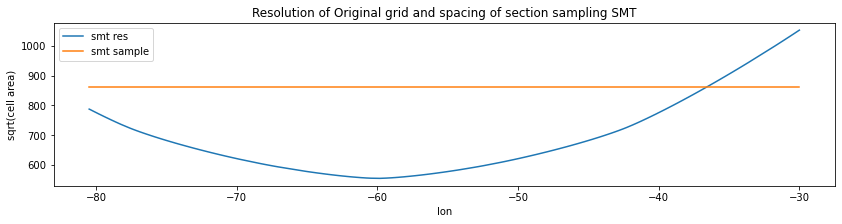

In [12]:
fig = plt.figure(figsize=(14,3))
grid_smt.plot(x="clon", label='smt res')
plt.plot(lon, ([d_smt_sec, d_smt_sec]), label='smt sample')
plt.xlabel('lon')
plt.ylabel('sqrt(cell area)')
plt.legend()
plt.title('Resolution of Original grid and spacing of section sampling SMT')

In [13]:

smt_sec = smt.isel(ncells=ickdtree)
smt_sec = smt_sec.assign_coords({"clon": ("ncells", lon_sec)})

smt_sec = smt_sec.h_sp

### Comparison

In [14]:
dm_smt = (smt_sec.clon[0]- smt_sec.clon[1]) * delta[32] #(ds_section.longitude[1] - ds_section.longitude[0]) * delta[const_lat]
dm_smt = dm_smt.data
dm_sat = (ds_section.longitude[1] - ds_section.longitude[0]) * delta[const_lat]
dm_sat = dm_sat.data

calc realisations

In [100]:
%%time
###########################################################
# smt
iii = 0
A_smt = np.zeros((984,2751))
for ii in np.arange(984)[::1]:
    t2 = ii 
    #t_smt = smt_sec.time[t2].data
    y = smt_sec.isel(time=t2)
    cv = y.data.compute() 
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
    S = S.squeeze()
    A_smt[iii,:] = S
    iii += 1

f_smt = f
np.save('data/A_smt', A_smt)
np.save('data/f_smt', f_smt)

NameError: name 'f_smt' is not defined

In [ ]:
%%time
###############################################################
# satellite
iii = 0
A_sat = np.zeros((90,101))
for ii in np.arange(90)[::1]:
    t_sat = ds_section.time[ii].data
    y = ds_section.isel(time=ii).adt
    cv = y.data.compute() 
    nans, x= nan_helper(cv) 
    cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
    S = S.squeeze()
    A_sat[iii,:] = S
    iii += 1

f_sat = f
np.save('data/A_sat', A_sat)
np.save('data/f_sat', f_sat)

In [15]:
A_smt = np.load('data/A_smt.npy')
f_smt = np.load('data/f_smt.npy')
A_sat = np.load('data/A_sat.npy')
f_sat = np.load('data/f_sat.npy')

In [16]:
A_sat_mean = np.mean(A_sat, axis=0)
std_sat = np.std(A_sat, axis=0)
A_smt_mean = np.mean(A_smt, axis=0)
std_smt = np.std(A_smt, axis=0)

In [78]:
f_sat[3]

6.387938125207043e-07

KeyboardInterrupt: 

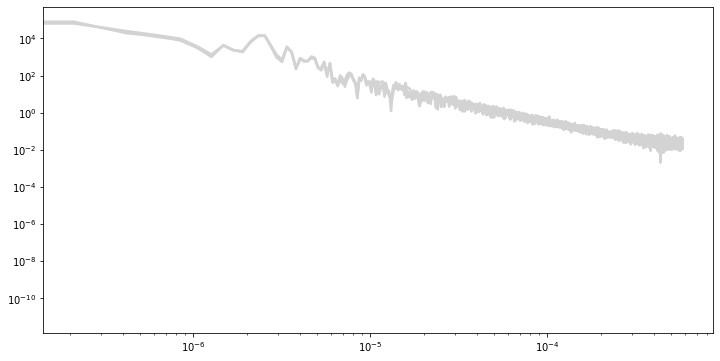

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
l=2.5

###########################################################
# smt
iii = 0
A_smt = np.zeros((328,2751))
for ii in np.arange(984)[::3]:
    t2 = ii 
    t_smt = smt_sec.time[t2].data
    y = smt_sec.isel(time=t2)
    cv = y.data.compute() 
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
    S = S.squeeze()
    A_smt[iii,:] = S
    iii += 1
    #S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='lightgrey')

###############################################################
# satellite
iii = 0
A_sat = np.zeros((90,101))
for ii in np.arange(90)[::1]:
    t_sat = ds_section.time[ii].data
    y = ds_section.isel(time=ii).adt
    cv = y.data.compute() #3month average
    nans, x= nan_helper(cv) # linear interpolation
    cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
    f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
    S = S.squeeze()
    A_sat[iii,:] = S
    iii += 1
    #S = np.convolve(S, kernel, mode='same')
    ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='wheat')


    
# smt average 3 month
y = smt_sec.isel(time=t2)
cv = y.data.compute() 
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_smt)
S = np.mean(A_smt, axis=0)
#S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='royalblue',  label=f'smt ssh 3 month mean')

# satelite adt average 3 month
y = ds_section.isel(time=ii).adt
cv = y.data.compute() #3month average
nans, x= nan_helper(cv) # linear interpolation
cv[nans]= np.interp(x(nans), x(~nans), cv[~nans])
f, S = sg.periodogram(cv-np.nanmean(cv), fs=1/dm_sat)
S = np.mean(A_sat, axis=0)
#S = np.convolve(S, kernel, mode='same')
ax.loglog(f[np.where(f>=0)], S[np.where(f>=0)], linewidth=l, color='tomato',  label=f'satellite adt 3 month mean')  

##############################################################################
#smt resolution
py = ax.get_ylim()
px = np.ones(2)/(2*d_smt_hi_res )
ax.plot(px, py,  linewidth=3, linestyle='--', color='royalblue')
ax.text(1/(2*d_smt_hi_res ), 8e3, 'Nyq. SMT hiRes', ha='right', va='top',rotation='vertical', fontsize=15)

# satellite distance does not need to be interpolated, therefore is the same
px = np.ones(2)/(2*dm_sat)
ax.plot(px, py,  linewidth=3, linestyle='--', color='tomato')
ax.text(1/(2*dm_sat), 8e3, 'Nyq. Satellite', ha='right', va='top',rotation='vertical', fontsize=15)

ax.autoscale(enable=True, tight=True)
ax.set_ylim(8e-4, 2e4)
#ax.autoscale(enable=True, tight=True)
#ax.set_xlim(1e-6, 1e10)
fig.tight_layout()

plt.legend(fontsize=15, loc='lower left')
ax.tick_params(labelsize=15)
plt.xlabel('Wavenumber (1/m)', fontsize=15)
plt.ylabel('Power Spectral Density m^2/(1/m)',fontsize=15)
plt.title('Averaged Spectral Estimates of SSH spatial series',fontsize=15);
#plt.savefig('../images/fft_ssh_spat_sat_smt_adt_Robust', bbox_inches='tight')

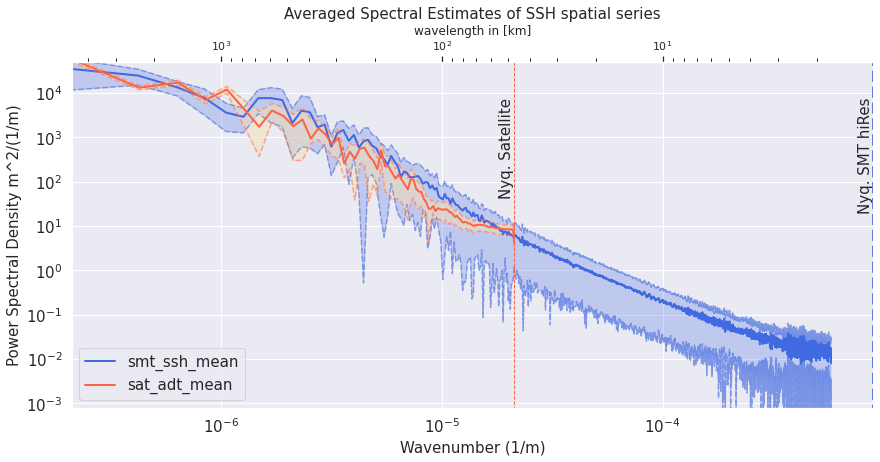

In [250]:


fig, ax = plt.subplots(1, 1, figsize=(12, 6))
l=2.5

# smt
kernel_size = 1
kernel = np.ones(kernel_size) / kernel_size
smean_m_std = np.abs(A_smt_mean - std_smt)
smean_m_std = np.convolve(smean_m_std, kernel, mode='same')
smean_p_std = np.abs(A_smt_mean + std_smt)
smean_p_std = np.convolve(smean_p_std, kernel, mode='same')

plt.loglog(f_smt, smean_p_std, color='royalblue', linestyle='--',alpha=0.5)
plt.loglog(f_smt, A_smt_mean, label='smt_ssh_mean', color='royalblue', linewidth=2)
plt.fill_between(f_smt, A_smt_mean, smean_p_std, color='royalblue', alpha=0.25)
plt.loglog(f_smt, smean_m_std, linestyle='--',  color='royalblue', alpha=0.5)
plt.fill_between(f_smt, A_smt_mean, smean_m_std, color='royalblue', alpha=0.25)

# satellite
kernel_size = 1
kernel = np.ones(kernel_size) / kernel_size
mean_m_std = np.abs(A_sat_mean - std_sat)
mean_m_std = np.convolve(mean_m_std, kernel, mode='same')
mean_p_std = np.abs(A_sat_mean + std_sat)
mean_p_std = np.convolve(mean_p_std, kernel, mode='same')

plt.loglog(f_sat, mean_p_std, color='tomato', linestyle='--', alpha=0.5)
plt.loglog(f_sat, A_sat_mean, label='sat_adt_mean', color='tomato', linewidth=2)
plt.fill_between(f_sat, A_sat_mean, mean_p_std, color='wheat', alpha=0.5)
plt.loglog(f_sat, mean_m_std, linestyle='--',  color='tomato', alpha=0.5)
plt.fill_between(f_sat, A_sat_mean, mean_m_std, color='wheat', alpha=0.5)

##############################################################################
#smt resolution
py = ax.get_ylim()
px = np.ones(2)/(2*d_smt_hi_res )
ax.plot(px, py,  linewidth=3, linestyle='--', color='royalblue')
ax.text(1/(2*d_smt_hi_res ), 8e3, 'Nyq. SMT hiRes', ha='right', va='top',rotation='vertical', fontsize=15)

# satellite distance does not need to be interpolated, therefore is the same
px = np.ones(2)/(2*dm_sat)
ax.plot(px, py,  linewidth=1, linestyle='--', color='tomato')
ax.text(1/(2*dm_sat), 8e3, 'Nyq. Satellite', ha='right', va='top',rotation='vertical', fontsize=15)

x = f_smt
def forward(x):
    return 1 / x / 1000
def inverse(x):
    return 1 / x 
secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel('wavelength in [km]')

ax.autoscale(enable=True, tight=True)
ax.set_ylim(8e-4, 5e4)
#ax.autoscale(enable=True, tight=True)
#ax.set_xlim(1e-6, 1e10)
fig.tight_layout()

plt.legend(fontsize=15, loc='lower left')
ax.tick_params(labelsize=15)
plt.xlabel('Wavenumber (1/m)', fontsize=15)
plt.ylabel('Power Spectral Density m^2/(1/m)',fontsize=15)
plt.title('Averaged Spectral Estimates of SSH spatial series',fontsize=15);
#plt.savefig('../images/fft_ssh_spat_sat_smt_adt_Robust_std_s', bbox_inches='tight')

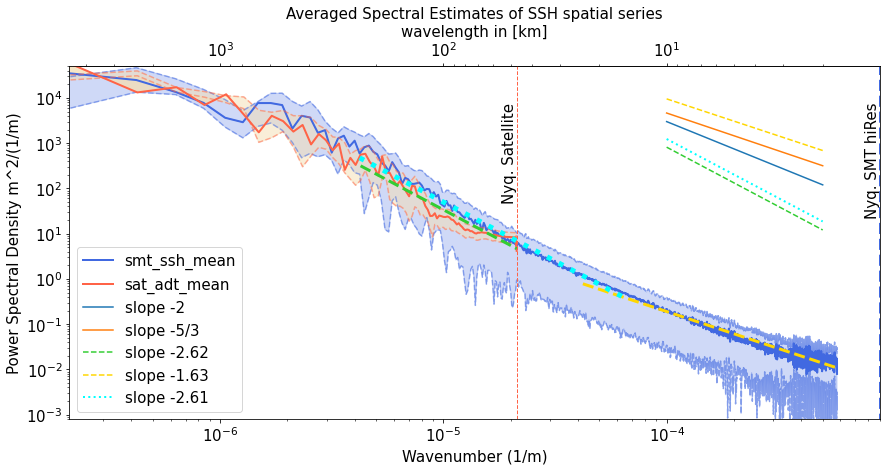

In [35]:
powerlaw = lambda x, amp, index: amp * (x**index)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
l=2.5

# smt
kernel_size = 2
kernel = np.ones(kernel_size) / kernel_size
smean_m_std = np.abs(A_smt_mean - std_smt)
smean_m_std = np.convolve(smean_m_std, kernel, mode='same')
smean_p_std = np.abs(A_smt_mean + std_smt)
smean_p_std = np.convolve(smean_p_std, kernel, mode='same')

plt.loglog(f_smt, smean_p_std, color='royalblue', linestyle='--',alpha=0.5)
plt.loglog(f_smt, A_smt_mean, label='smt_ssh_mean', color='royalblue', linewidth=2)
plt.fill_between(f_smt, A_smt_mean, smean_p_std, color='royalblue', alpha=0.25)
plt.loglog(f_smt, smean_m_std, linestyle='--',  color='royalblue', alpha=0.5)
plt.fill_between(f_smt, A_smt_mean, smean_m_std, color='royalblue', alpha=0.25)

# satellite
kernel_size = 2
kernel = np.ones(kernel_size) / kernel_size
mean_m_std = np.abs(A_sat_mean - std_sat)
mean_m_std = np.convolve(mean_m_std, kernel, mode='same')
mean_p_std = np.abs(A_sat_mean + std_sat)
mean_p_std = np.convolve(mean_p_std, kernel, mode='same')

plt.loglog(f_sat, mean_p_std, color='tomato', linestyle='--', alpha=0.5)
plt.loglog(f_sat, A_sat_mean, label='sat_adt_mean', color='tomato', linewidth=2)
plt.fill_between(f_sat, A_sat_mean, mean_p_std, color='wheat', alpha=0.5)
plt.loglog(f_sat, mean_m_std, linestyle='--',  color='tomato', alpha=0.5)
plt.fill_between(f_sat, A_sat_mean, mean_m_std, color='wheat', alpha=0.5)

#####################
fx = np.linspace(1e-4,5e-4,100)
pp = 10000
y2 = pp* 3e-9*np.power(fx, (-2))
y5 = pp* 1e-7*np.power(fx, (-5/3))

plt.loglog(fx,y2, label='slope -2')
plt.loglog(fx,y5, label='slope -5/3')

# slope satellite
xdata = f_sat[20:]
ydata = A_sat_mean[20:]
logx = np.log10(xdata)
logy = np.log10(ydata)
res = stats.linregress(logx, logy)
index = res.slope
amp = 10**res.intercept
plt.plot(xdata, powerlaw(xdata, amp, index),linewidth=3, linestyle='dashed', color="limegreen")  
plt.plot(fx, powerlaw(fx, pp*amp, index), linestyle='dashed', color="limegreen", label=f'slope {index:3.3}') 


# slope smt
xdata = f_smt[200:]
ydata = A_smt_mean[200:]
logx = np.log10(xdata)
logy = np.log10(ydata)
res = stats.linregress(logx, logy)
index = res.slope
amp = 10**res.intercept
plt.plot(xdata, powerlaw(xdata, amp, index),linewidth=3, linestyle='dashed', color="gold")  
plt.plot(fx, powerlaw(fx, 5*pp*amp, index), linestyle='dashed', color="gold", label=f'slope {index:3.3}') 

# slope smt
xdata = f_smt[20:300]
ydata = A_smt_mean[20:300]
logx = np.log10(xdata)
logy = np.log10(ydata)
res = stats.linregress(logx, logy)
index = res.slope
amp = 10**res.intercept
plt.plot(xdata, powerlaw(xdata, amp, index), linewidth=5, linestyle='dotted', color="aqua")  
plt.plot(fx, powerlaw(fx, pp*amp, index), linewidth=2, linestyle='dotted', color="aqua", label=f'slope {index:3.3}') 



##############################################################################
#smt resolution
py = ax.get_ylim()
px = np.ones(2)/(2*d_smt_hi_res )
ax.plot(px, py,  linewidth=3, linestyle='--', color='royalblue')
ax.text(1/(2*d_smt_hi_res ), 8e3, 'Nyq. SMT hiRes', ha='right', va='top',rotation='vertical', fontsize=15)

# satellite distance does not need to be interpolated, therefore is the same
px = np.ones(2)/(2*dm_sat)
ax.plot(px, py,  linewidth=1, linestyle='--', color='tomato')
ax.text(1/(2*dm_sat), 8e3, 'Nyq. Satellite', ha='right', va='top',rotation='vertical', fontsize=15)

x = f_smt
def forward(x):
    return 1 / x / 1000
def inverse(x):
    return 1 / x 
secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel('wavelength in [km]', fontsize=15)

ax.autoscale(enable=True, tight=True)
ax.set_ylim(8e-4, 5e4)
#ax.autoscale(enable=True, tight=True)
#ax.set_xlim(1e-6, 1e10)
fig.tight_layout()

plt.legend(fontsize=15, loc='lower left')
ax.tick_params(labelsize=15)
secax.tick_params(labelsize=15)
plt.xlabel('Wavenumber (1/m)', fontsize=15)
plt.ylabel('Power Spectral Density m^2/(1/m)',fontsize=15)
plt.title('Averaged Spectral Estimates of SSH spatial series',fontsize=15);
plt.savefig('../images/fft_ssh_spat_sat_smt_adt_Robust_std_s', bbox_inches='tight')

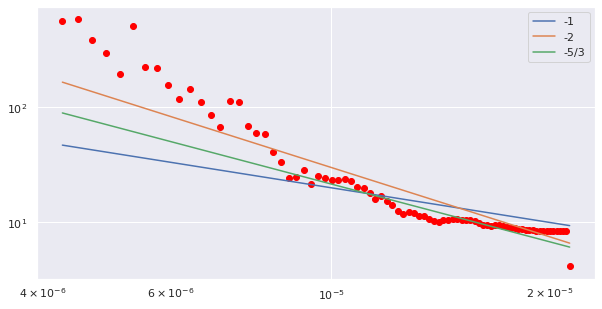

In [246]:
########## slope
fig = plt.figure(figsize=(10,5))
x = np.linspace(f_sat[0],f_sat[100], 101)
intercept, slope = np.polyfit(np.log(f_sat[20:]), np.log(A_sat_mean[20:]),1)
#y1 = 10*np.power(np.log(x[20:]),-2)
y =  2e-4*np.power(f_sat[20:], (-1))
y2 =  3e-9*np.power(f_sat[20:], (-2))
y5 =  1e-7*np.power(f_sat[20:], (-5/3))
plt.scatter((f_sat[20:]), (A_sat_mean[20:]),color='red')

plt.loglog(x[20:],y, label='-1')
#plt.semilogy(x[20:],y1)
plt.loglog(x[20:],y2, label='-2')
plt.loglog(x[20:],y5, label='-5/3')
#plt.ylim(8e-1, 5e4)
#plt.xlim(1e-6, 3e-5)
plt.legend()

In [251]:
from scipy.stats import linregress
result = linregress((f_sat[:25]), (A_sat_mean[:25]))

LinregressResult(slope=-935506.2367614706, intercept=25.847353625669854, rvalue=-0.8345744392012585, pvalue=2.7663278212321722e-14, stderr=88217.05284764813, intercept_stderr=1.4356890130575246)

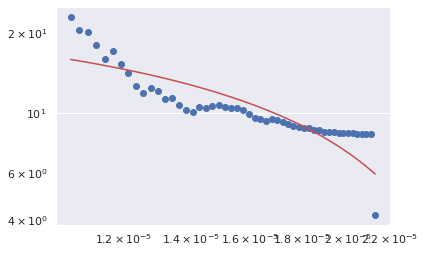

In [272]:
x = f_sat[50:]
y = (A_sat_mean[50:])
res = stats.linregress(x, y)
plt.scatter(x,y)
plt.loglog(x, res.intercept + res.slope*x, 'r', label='fitted line')
res

In [261]:
res

LinregressResult(slope=-3928688549.4727583, intercept=15343.662385679205, rvalue=-0.524748116358914, pvalue=0.007078567187785162, stderr=1328904496.560849, intercept_stderr=3961.514525892055)

LinregressResult(slope=-1.508911044807089, intercept=-6.223508787340144, rvalue=-0.9464210485429627, pvalue=1.190087634151265e-30, stderr=0.06702992638521371, intercept_stderr=0.3246002769276628)


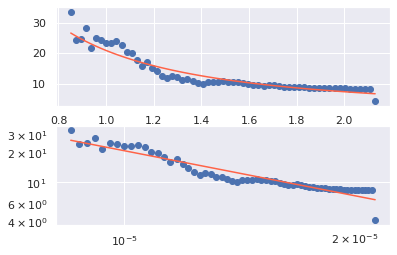

In [346]:
from scipy.stats import linregress
powerlaw = lambda x, amp, index: amp * (x**index)
######
# we search. a function like y = A* x^P
# transform to linear problem by taking log10
# use linear regression method to find slope and intercept: y = ax +b
# p equals slope
# amplitude equals 10**a since 10**log10(A) = A

xdata = f_sat[40:]
ydata = A_sat_mean[40:]
logx = np.log10(xdata)
logy = np.log10(ydata)
res = stats.linregress(logx, logy)
print(res)

plt.subplot(2,1,1)
index = res.slope
amp = 10**res.intercept
plt.plot(xdata, powerlaw(xdata, amp, index), color="tomato")     # Fit
plt.scatter(xdata, ydata)  # Data

plt.subplot(2,1,2)
plt.loglog(xdata, powerlaw(xdata, amp, index), color="tomato")     # Fit
plt.scatter(xdata, ydata)  # Data

In [308]:
# Define function for calculating a power law
powerlaw = lambda x, amp, index: amp * (x**index)

##########
# Generate data points with noise
##########
num_points = 20

# Note: all positive, non-zero data
xdata = np.linspace(1.1, 10.1, num_points)
ydata = powerlaw(xdata, 10.0, -2.0)     # simulated perfect data
yerr = 0.2 * ydata                      # simulated errors (10%)

ydata += np.random.randn(num_points) * yerr       # simulated noisy data

[ 0.94832043 -1.89586653]
[[ 0.0183343  -0.02308249]
 [-0.02308249  0.03253399]]


(1.0, 11)

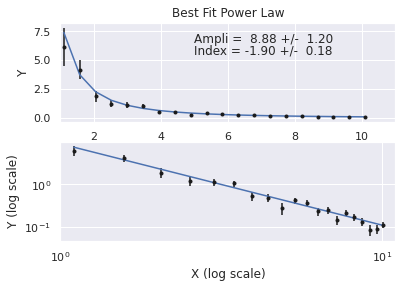

In [309]:
##########
# Fitting the data -- Least Squares Method
##########

# Power-law fitting is best done by first converting
# to a linear equation and then fitting to a straight line.
# Note that the `logyerr` term here is ignoring a constant prefactor.
#
#  y = a * x^b
#  log(y) = log(a) + b*log(x)
#

logx = np.log10(xdata)
logy = np.log10(ydata)
logyerr = yerr / ydata

# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

pinit = [1.0, -1.0]
out = optimize.leastsq(errfunc, pinit,
                       args=(logx, logy, logyerr), full_output=1)

pfinal = out[0]
covar = out[1]
print(pfinal)
print(covar)

index = pfinal[1]
amp = 10.0**pfinal[0]

indexErr = np.sqrt( covar[1][1] )
ampErr = np.sqrt( covar[0][0] ) * amp

##########
# Plotting data
##########

plt.clf()
plt.subplot(2, 1, 1)
plt.plot(xdata, powerlaw(xdata, amp, index))     # Fit
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.text(5, 6.5, 'Ampli = %5.2f +/- %5.2f' % (amp, ampErr))
plt.text(5, 5.5, 'Index = %5.2f +/- %5.2f' % (index, indexErr))
plt.title('Best Fit Power Law')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(1, 11)

plt.subplot(2, 1, 2)
plt.loglog(xdata, powerlaw(xdata, amp, index))
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.xlabel('X (log scale)')
plt.ylabel('Y (log scale)')
plt.xlim(1.0, 11)

In [296]:
index

-2.8554948850461983

In [282]:
out

(array([ 1.0458324, -2.0240841]),
 array([[ 0.01187126, -0.01497542],
        [-0.01497542,  0.02253867]]),
 {'fvec': array([ 0.33329467, -0.09268781,  0.40661519, -0.51629658, -0.60418847,
          0.11278076, -0.64164186, -0.58334376,  0.30416729, -0.0945501 ,
          0.38793757, -0.52954014, -0.42398468, -0.39895774, -0.24304383,
         -0.11298891,  1.19941918,  0.23550108, -0.65747134, -0.15450571]),
  'nfev': 7,
  'fjac': array([[ 2.28152123e+01,  2.31353130e-01,  2.77524405e-01,
           1.77625985e-01,  1.63271385e-01,  2.47481873e-01,
           1.55280322e-01,  1.64174400e-01,  2.63386986e-01,
           2.24141014e-01,  2.69857350e-01,  1.70188996e-01,
           1.84407349e-01,  1.87271132e-01,  2.05787594e-01,
           2.19802103e-01,  3.32664201e-01,  2.53585577e-01,
           1.46715739e-01,  2.14175908e-01],
         [ 1.51591674e+01, -6.66094506e+00,  2.08169514e-01,
           7.82447241e-02,  3.01032823e-02, -8.42958208e-03,
          -3.48590983e-02, -6.45

In [324]:
xdata = f_sat[30:]
ydata = A_sat_mean[30:]
yerr = 0.2 * ydata   

In [319]:
logx = np.log10(xdata)
logy = np.log10(ydata)
res = stats.linregress(logx, logy)
res

LinregressResult(slope=-2.1436554670121266, intercept=-9.269245330778865, rvalue=-0.9383652109461682, pvalue=1.490275181960796e-33, stderr=0.09505813786731822, intercept_stderr=0.4643536240353905)

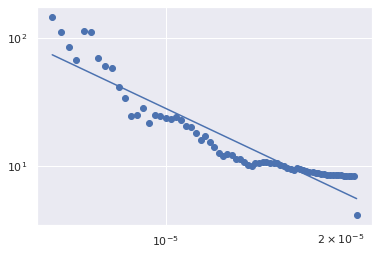

In [330]:
index = res.slope
amp = 10**res.intercept
plt.loglog(xdata, powerlaw(xdata, amp, index))     # Fit
plt.scatter(xdata, ydata)  # Data

[-9.26924532 -2.14365546]
[[0.61287452 0.12540427]
 [0.12540427 0.0256834 ]]


Text(0, 0.5, 'Y (log scale)')

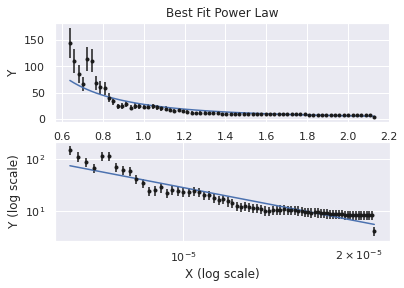

In [326]:
##########
# Fitting the data -- Least Squares Method
##########

# Power-law fitting is best done by first converting
# to a linear equation and then fitting to a straight line.
# Note that the `logyerr` term here is ignoring a constant prefactor.
#
#  y = a * x^b
#  log(y) = log(a) + b*log(x)
#

logx = np.log10(xdata)
logy = np.log10(ydata)
logyerr = yerr / ydata

# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

pinit = [1.0, -1.0]
out = optimize.leastsq(errfunc, pinit,
                       args=(logx, logy, logyerr), full_output=1)

pfinal = out[0]
covar = out[1]
print(pfinal)
print(covar)

index = pfinal[1]
amp = 10.0**pfinal[0]

indexErr = np.sqrt( covar[1][1] )
ampErr = np.sqrt( covar[0][0] ) * amp

##########
# Plotting data
##########

plt.clf()
plt.subplot(2, 1, 1)
plt.plot(xdata, powerlaw(xdata, amp, index))     # Fit
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
#plt.text(5, 6.5, 'Ampli = %5.2f +/- %5.2f' % (amp, ampErr))
#plt.text(5, 5.5, 'Index = %5.2f +/- %5.2f' % (index, indexErr))
plt.title('Best Fit Power Law')
plt.xlabel('X')
plt.ylabel('Y')
#plt.xlim(1, 11)

plt.subplot(2, 1, 2)
plt.loglog(xdata, powerlaw(xdata, amp, index))
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.xlabel('X (log scale)')
plt.ylabel('Y (log scale)')
#plt.xlim(1.0, 11)

In [333]:
pfinal[0]

-9.269245316338388

In [254]:
from scipy import stats
rng = np.random.default_rng()

x = rng.random(10)
y = 1.6*x + rng.random(10)
res = stats.linregress(x, y)

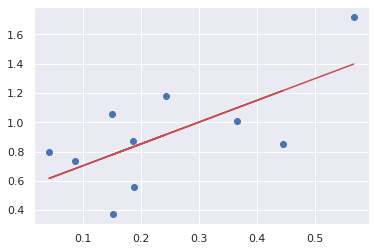

In [258]:
plt.scatter(x,y)
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

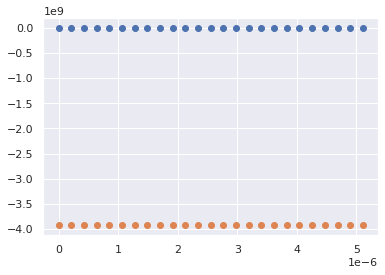

In [162]:
plt.scatter((f_sat[:25]), (A_sat_mean[:25]))
intercept, slope = np.polyfit((f_sat[:25]), (A_sat_mean[:25]),1)
y = intercept + slope*f_sat[:25]
from scipy.stats import linregress
linregress((f_sat[:25]), (A_sat_mean[:25]))
plt.scatter(f_sat[:25], y)

In [155]:
intercept

-5509453023.722033

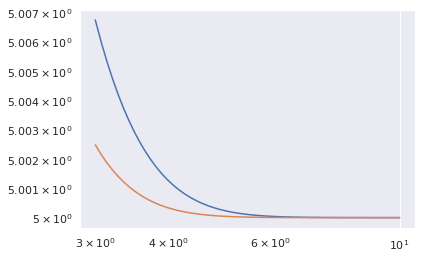

In [46]:
x = np.linspace(3,10,100)
y = 5 + np.exp(-5/3*x)
y2 = 5 + np.exp(-2*x)

#plt.plot(x,y)
#plt.semilogy(x,y)
plt.loglog(x,y)
plt.loglog(x,y2)

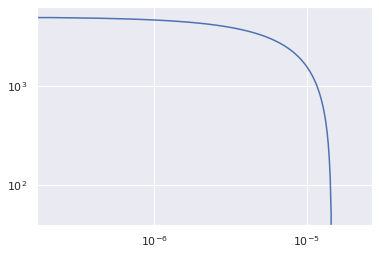

In [64]:
########## slope
x = np.linspace(f_sat[0],f_sat[100], 101)
y = intercept + slope*x
plt.loglog(x,y)

In [60]:

slope, intercept = np.polyfit((f_sat),(A_sat_mean),1)
print(slope, intercept)
es = np.log(-slope)
print(es)

-336988906.22508365 4929.593194783598
19.635560568561385


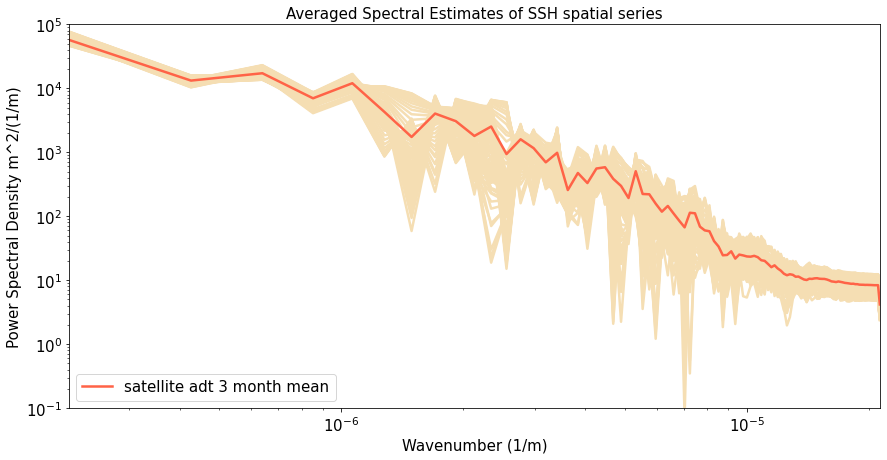

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
l=2.5


###############################################################
# satellite
iii = 0
#A_sat = np.zeros((90,101))
for ii in np.arange(90)[::1]:
    ax.loglog(f_sat[np.where(f_sat>=0)], A_sat[ii,np.where(f_sat>=0)].squeeze(), linewidth=l, color='wheat')

S = np.mean(A_sat, axis=0)
ax.loglog(f_sat[np.where(f_sat>=0)], S[np.where(f_sat>=0)], linewidth=l, color='tomato',  label=f'satellite adt 3 month mean')  


ax.autoscale(enable=True, tight=True)
ax.set_ylim(1e-1, 1e5)
#ax.set_xlim(1e-6, 1e10)
fig.tight_layout()

plt.legend(fontsize=15, loc='lower left')
ax.tick_params(labelsize=15)
plt.xlabel('Wavenumber (1/m)', fontsize=15)
plt.ylabel('Power Spectral Density m^2/(1/m)',fontsize=15)
plt.title('Averaged Spectral Estimates of SSH spatial series',fontsize=15);
#plt.savefig('../images/fft_ssh_spat_sat_smt_adt_Robust', bbox_inches='tight')

In [22]:
import seaborn as sns

In [49]:
O = np.array((f,A_sat[1,:]))
O.shape

(2, 101)

<AxesSubplot:>

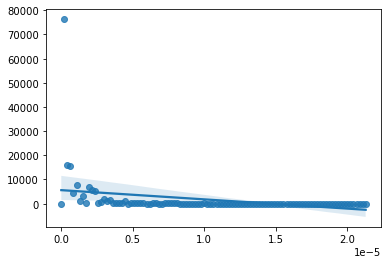

In [25]:
x =  10**np.arange(1, 10)
y = 10** np.arange(1,10)*2
df1 = pd.DataFrame( data=y, index=x )
df2 = pd.DataFrame(data = {'x': x, 'y': y}) 

sns.regplot(f_sat, A_sat[2,:])

In [16]:
fmri

subject  timepoint event    region    signal
0        s13         18  stim  parietal -0.017552
1         s5         14  stim  parietal -0.080883
2        s12         18  stim  parietal -0.081033
3        s11         18  stim  parietal -0.046134
4        s10         18  stim  parietal -0.037970
...      ...        ...   ...       ...       ...
1059      s0          8   cue   frontal  0.018165
1060     s13          7   cue   frontal -0.029130
1061     s12          7   cue   frontal -0.004939
1062     s11          7   cue   frontal -0.025367
1063      s0          0   cue  parietal -0.006899

[1064 rows x 5 columns]

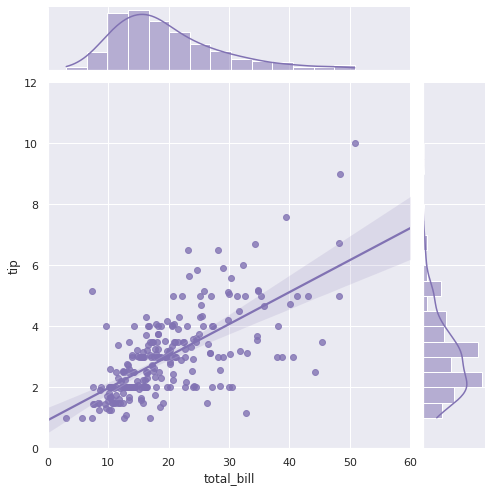

In [26]:
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

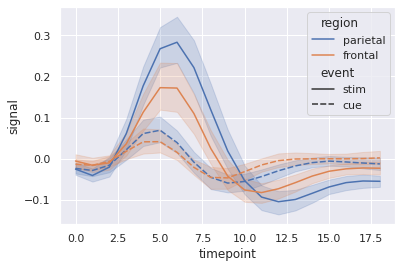

In [33]:
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

In [44]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
tips = sns.load_dataset("tips")
tips["big_tip"] = (tips.tip / tips.total_bill) > .15

ModuleNotFoundError: No module named 'statsmodels'

ModuleNotFoundError: No module named 'statsmodels'

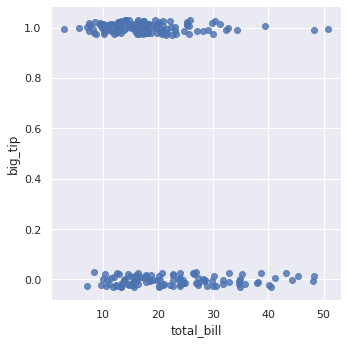

In [43]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

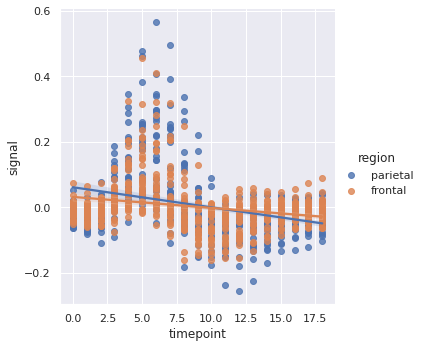

In [34]:
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lmplot(x="timepoint", y="signal",
             hue="region",
             data=fmri)

In [38]:
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lmplot(f_sat, data=S)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [36]:
S.shape

(101,)

In [45]:
A_sat.shape

(90, 101)

In [50]:

std.shape

(101,)

In [55]:
A_sat_mean = np.mean(A_sat, axis=0)
std = np.std(A_sat, axis=0)

In [51]:
std

array([2.30877251e-28, 7.34531841e+03, 1.30486957e+03, 2.25997131e+03,
       1.15988115e+03, 2.18314291e+03, 2.56525136e+03, 2.11067383e+03,
       1.76380565e+03, 1.71814312e+03, 1.50708035e+03, 2.22098970e+03,
       1.67448640e+03, 7.10674634e+02, 5.76531474e+02, 3.17662165e+02,
       6.63145803e+02, 1.34692966e+02, 2.77754502e+02, 2.92033718e+02,
       2.96110807e+02, 3.41432247e+02, 3.48650932e+02, 2.09615063e+02,
       1.43981567e+02, 2.23766676e+02, 1.63077391e+02, 1.66503039e+02,
       1.18572088e+02, 7.61730115e+01, 1.05303782e+02, 7.67888400e+01,
       6.09452418e+01, 5.34768230e+01, 7.87117779e+01, 6.73822649e+01,
       4.17194805e+01, 3.54114405e+01, 3.02666955e+01, 2.52965919e+01,
       1.30035457e+01, 2.03234588e+01, 1.20197246e+01, 9.08827600e+00,
       1.00497135e+01, 1.14354831e+01, 1.00930887e+01, 1.04103672e+01,
       1.16030314e+01, 1.02596094e+01, 1.03936149e+01, 9.61957073e+00,
       7.91474958e+00, 6.24573600e+00, 5.97110090e+00, 6.67723264e+00,
      

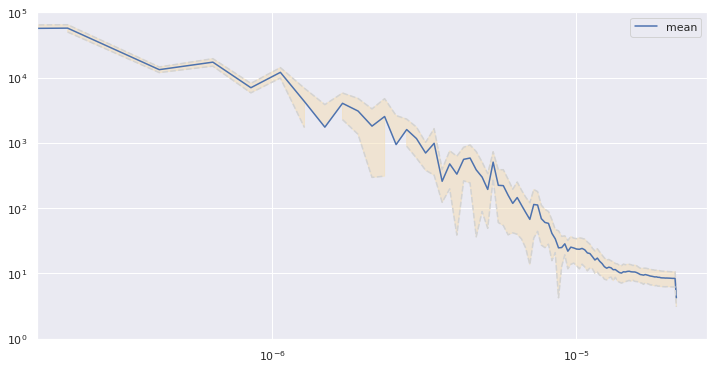

In [89]:
fig = plt.figure(figsize=(12,6))
plt.loglog(f_sat, np.sqrt(A_sat_mean + std)**2, color='lightgrey', linestyle='--')
plt.loglog(f_sat, A_sat_mean, label='mean')
plt.fill_between(f_sat, A_sat_mean, (A_sat_mean + std), color='wheat', alpha=0.5)
plt.loglog(f_sat, np.sqrt(A_sat_mean - std)**2, linestyle='--',  color='lightgrey')
plt.fill_between(f_sat, A_sat_mean, np.sqrt(A_sat_mean - std)**2, color='wheat', alpha=0.5)
plt.ylim(1e0,1e5)
plt.legend()

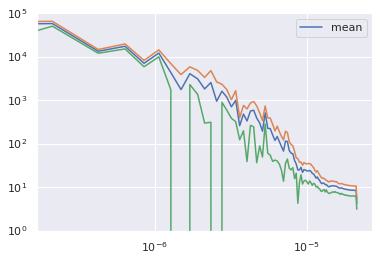

In [78]:
fig = plt.figure()
plt.loglog(f_sat, A_sat_mean, label='mean')
plt.loglog(f_sat, (A_sat_mean + std))
plt.loglog(f_sat, (A_sat_mean - std))
plt.ylim(1e0,1e5)
plt.legend()

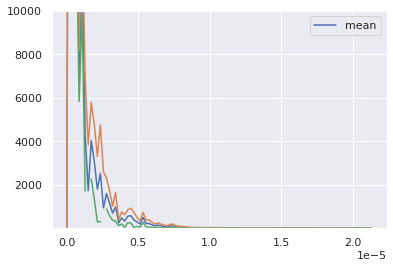

In [74]:
fig = plt.figure()
plt.plot(f_sat, A_sat_mean, label='mean')
plt.plot(f_sat, np.sqrt(A_sat_mean + std)**2)
plt.plot(f_sat, np.sqrt(A_sat_mean - std)**2)
plt.ylim(1e0,1e4)
plt.legend()

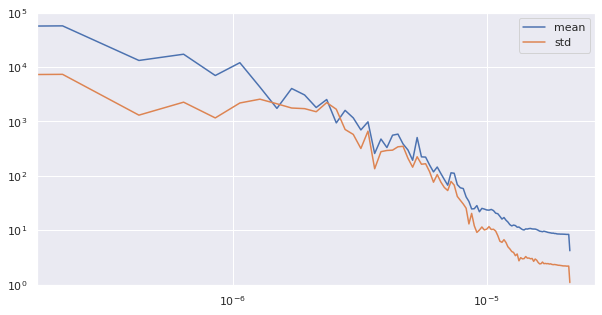

In [77]:
fig = plt.figure(figsize=(10,5))
plt.loglog(f_sat, A_sat_mean, label='mean')
plt.loglog(f_sat,  std, label='std')

plt.ylim(1e0,1e5)
plt.legend()

In [164]:
a = f_sat
b = A_sat_mean
from scipy.stats import linregress
linregress(a, b)

LinregressResult(slope=-336988906.2250838, intercept=4929.593194783602, rvalue=-0.339897768914869, pvalue=0.0005060178829269571, stderr=93711119.28395528, intercept_stderr=1154.9228522598744)

In [187]:
slope, intercept = np.polyfit(a,b,1)
print(intercept)

4929.593194783598


In [189]:
x = a 
y = b

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 27.060651446196363
	b = popt[1] = 1.7697878130955808e-07
Modified Exponential Fit: y = (a*(x**b)) + c
	a = popt[0] = 218.00665942872948
	b = popt[1] = 4.316682629813238e-08
	c = popt[2] = 92.82533981957663


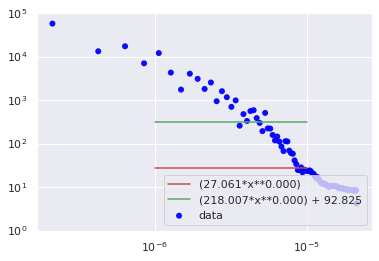

In [202]:
from scipy.optimize import curve_fit

fig = plt.figure()
ax=plt.gca() 
ax.scatter(x,y,c="blue",alpha=0.95,edgecolors='none', label='data')
ax.set_yscale('log')
ax.set_xscale('log')
newX = np.logspace(-6, -5, base=10)  # Makes a nice domain for the fitted curves.
                                   # Goes from 10^0 to 10^3
                                   # This avoids the sorting and the swarm of lines.

# Let's fit an exponential function.  
# This looks like a line on a lof-log plot.
def myExpFunc(x, a, b):
    return a * np.power(x, b)
popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-', 
         label="({0:.3f}*x**{1:.3f})".format(*popt))
print("Exponential Fit: y = (a*(x**b))")
print("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

# Let's fit a more complicated function.
# This won't look like a line.
def myComplexFunc(x, a, b, c):
    return a * np.power(x, b) + c
popt, pcov = curve_fit(myComplexFunc, x, y)
plt.plot(newX, myComplexFunc(newX, *popt), 'g-', 
         label="({0:.3f}*x**{1:.3f}) + {2:.3f}".format(*popt))
print("Modified Exponential Fit: y = (a*(x**b)) + c")
print("\ta = popt[0] = {0}\n\tb = popt[1] = {1}\n\tc = popt[2] = {2}".format(*popt))

ax.set_ylim(1e0,1e5)

ax.grid(b='on')
plt.legend(loc='lower right')
plt.show()

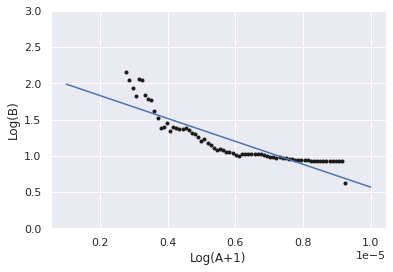

In [165]:

x = f_sat[30:]
y = A_sat_mean[30:]
slope, intercept, r_value, p_value, std_err = linregress(np.log10(x+1), np.log10(y))

xfid = np.linspace(1e-6,1e-5)     # This is just a set of x to plot the straight line 

plt.plot(np.log10(x+1), np.log10(y), 'k.')
plt.plot(xfid, xfid*slope+intercept)
plt.xlabel('Log(A+1)')
plt.ylabel('Log(B)')
plt.ylim(0,3)
plt.show()

In [168]:
np.log10(-slope)

5.198326904371001

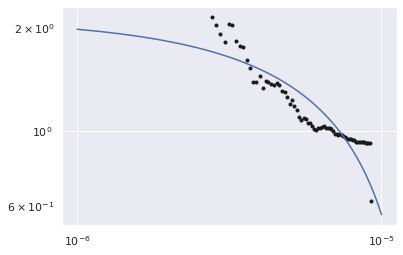

In [169]:
plt.loglog(np.log10(x+1), np.log10(y), 'k.')
plt.loglog(xfid, xfid*slope+intercept)